In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits = load_digits()

In [2]:
print("image data shape", digits.data.shape)
print("label data shape", digits.target.shape)

image data shape (1797, 64)
label data shape (1797,)


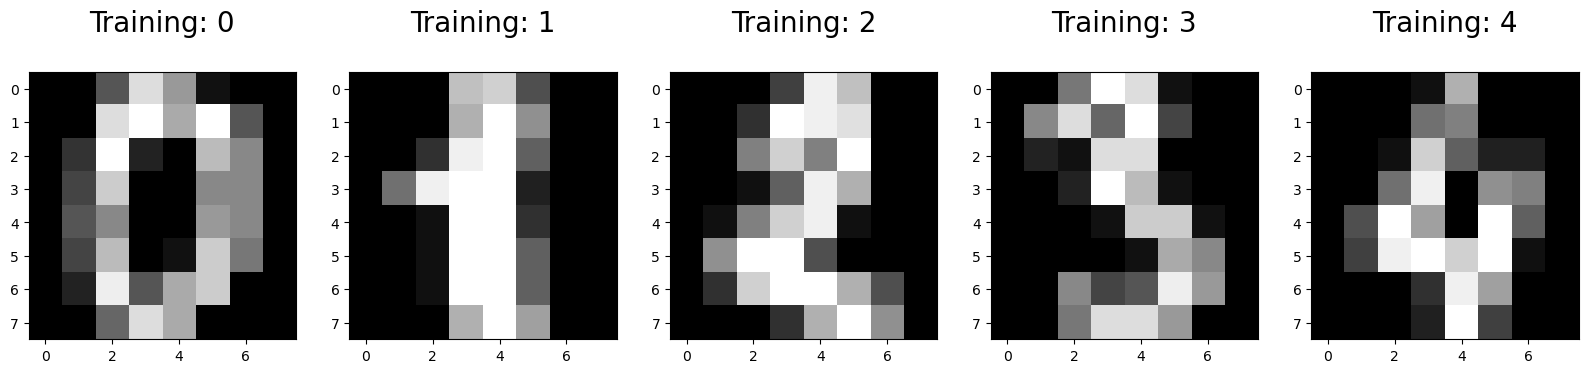

In [3]:
plt.figure(figsize = (20,4))
for index, (image,label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5,index +1)
    plt.imshow(np.reshape(image, (8,8)), cmap = plt.cm.gray)
    plt.title('Training: %i\n' % label,fontsize = 20)

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.23, random_state = 2)

In [5]:
print(x_train.shape)

(1383, 64)


In [6]:
print(y_train.shape)

(1383,)


In [7]:
print(x_test.shape)

(414, 64)


In [9]:
print(y_test.shape)

(414,)


In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

C:\Users\Ranjith.LAPTOP-ACMNJN92\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
print(logreg.predict(x_test[0].reshape(1,-1)))

[4]


In [13]:
logreg.predict(x_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [36]:
predictions = logreg.predict(x_test)

In [37]:
score = logreg.score(x_test,y_test)

In [38]:
print(score)

0.9516908212560387


In [39]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
print(cm)


[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


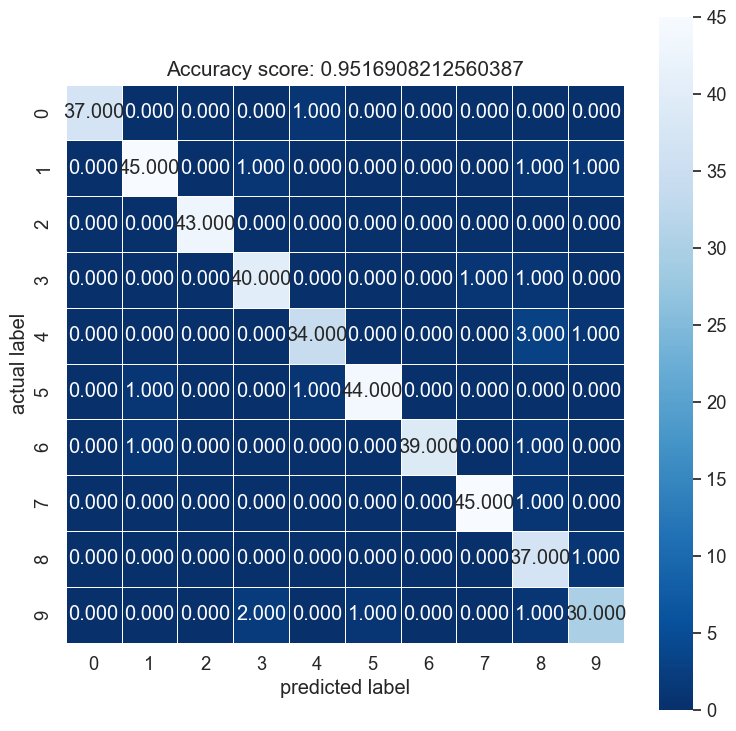

In [41]:
plt.figure(figsize = (9,9))
sns.heatmap(cm,annot = True, fmt= ".3f",linewidths = .5, square = True, cmap = 'Blues_r');
plt.ylabel('actual label');
plt.xlabel('predicted label');
all_sample_title = 'Accuracy score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
